In [2]:
# ---------- Importing Dependencies ---------- #
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Reading to dogData from CSV File
dogData = pd.read_csv('/content/sample_data/dogs_dataset.csv')

In [3]:
# ---------- Showing head of dataset ---------- #

print("\nDog Characteristics:")
print(dogData.head())


Dog Characteristics:
                  Breed  Age (Years)  Weight (kg)    Color  Gender
0      Airedale Terrier           13           35    White    Male
1  Jack Russell Terrier           10           43      Tan  Female
2        Dogo Argentino            2           16  Spotted  Female
3    Labrador Retriever            9           57  Bicolor    Male
4        French Bulldog           12           39  Spotted    Male


In [4]:
# ---------- Printing metadata summary---------- #

print("Description of 'named' characteristics:\n")
print(dogData[['Breed', 'Color', 'Gender']].describe())

print("\n\nDescription of 'numeric' characteristics:\n")
print(dogData[['Age (Years)', 'Weight (kg)']].describe())

Description of 'named' characteristics:

             Breed            Color  Gender
count         3000             3000    3000
unique          53               16       2
top     Rottweiler  Black and White  Female
freq           118              205    1520


Description of 'numeric' characteristics:

       Age (Years)  Weight (kg)
count  3000.000000  3000.000000
mean      7.499000    32.059667
std       4.011238    15.628463
min       1.000000     5.000000
25%       4.000000    19.000000
50%       8.000000    33.000000
75%      11.000000    45.000000
max      14.000000    59.000000


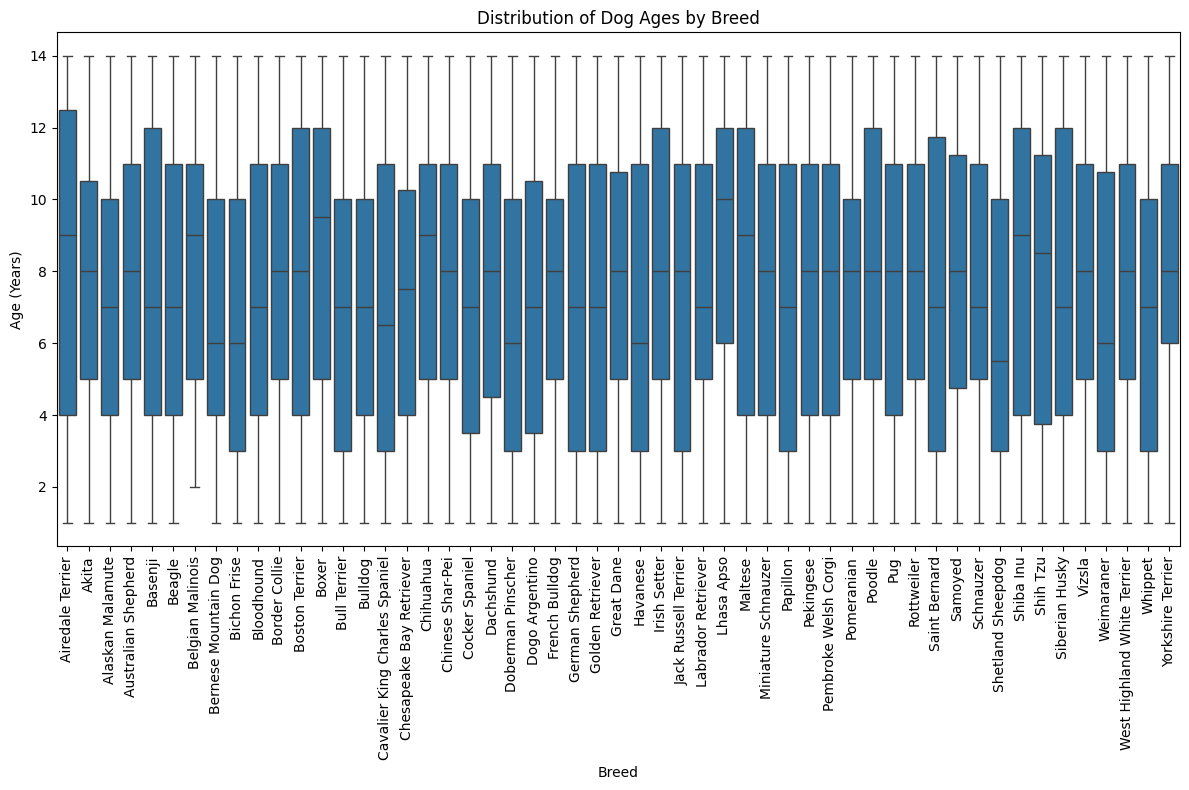

In [5]:
# ---------- Ages by Breed plot ---------- #

dogData['Breed'] = dogData['Breed'].astype('category')
dogData['Age (Years)'] = pd.to_numeric(dogData['Age (Years)'], errors='coerce')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Breed', y='Age (Years)', data=dogData)
plt.xticks(rotation=90)

plt.title('Distribution of Dog Ages by Breed')
plt.xlabel('Breed')
plt.ylabel('Age (Years)')
plt.tight_layout()
plt.show()

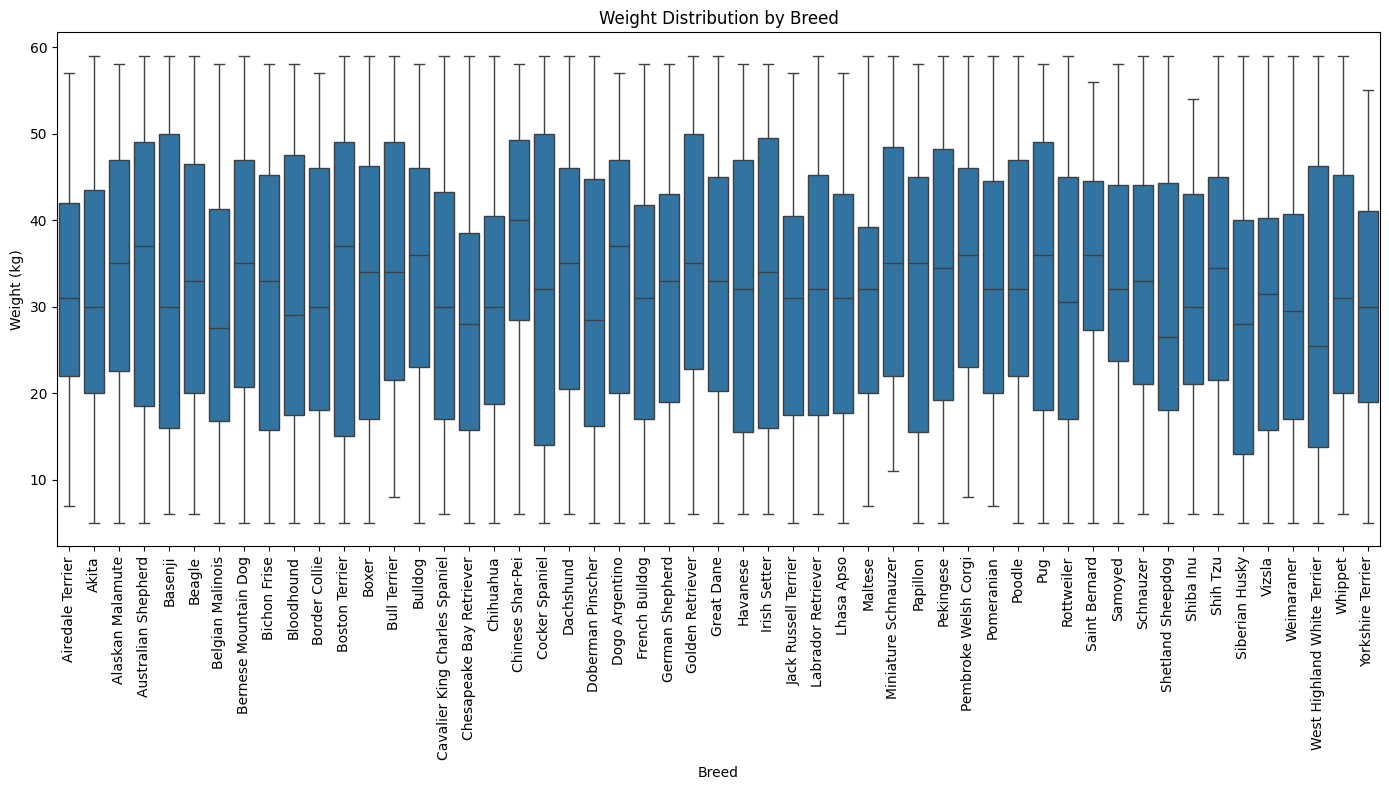

In [6]:
# ---------- Weight by Breed plot ---------- #

dogData['Breed'] = dogData['Breed'].astype('category')
dogData['Weight (kg)'] = pd.to_numeric(dogData['Weight (kg)'], errors='coerce')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Breed', y='Weight (kg)', data=dogData)
plt.xticks(rotation=90)

plt.title('Weight Distribution by Breed')
plt.xlabel('Breed')
plt.ylabel('Weight (kg)')
plt.tight_layout()
plt.show()

In [7]:
# --------- Average Age and Weight by Breed plot ---------- #

#using plotly library
df_mean = dogData.groupby("Breed")[['Age (Years)', 'Weight (kg)']].mean().reset_index()
df_mean.columns = ['Breed', 'Age_mean', 'Weight_mean']
df_mean_sorted = df_mean.sort_values("Age_mean", ascending=False)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_mean_sorted["Breed"],
    y=df_mean_sorted["Age_mean"],
    mode='markers+lines',
    name='Average Age',
    marker=dict(color='blue', size=10),
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df_mean_sorted["Breed"],
    y=df_mean_sorted["Weight_mean"],
    mode='markers+lines',
    name='Average Weight',
    marker=dict(color='red', size=10),
    line=dict(color='red'),
    yaxis='y2'
))

fig.update_layout(
    title='Average Age and Weight by Breed',
    xaxis_title='Breed',
    yaxis_title='Average Age (Years)',
    yaxis2=dict(
        title='Average Weight (kg)',
        overlaying='y',
        side='right'
    ),
    xaxis_tickangle=-45
)

fig.show()

<ipython-input-7-9e6cf83091c4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = dogData.groupby("Breed")[['Age (Years)', 'Weight (kg)']].mean().reset_index()


<ipython-input-8-92cf30a77c77>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




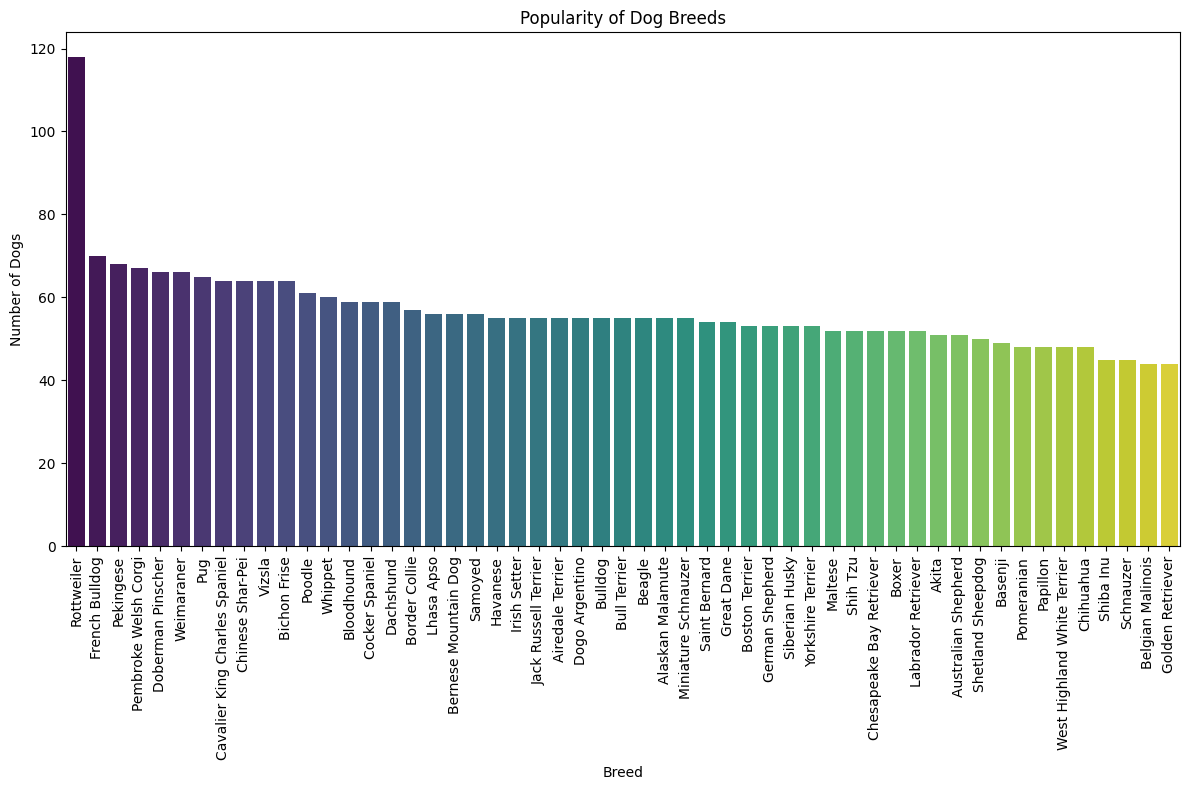

In [8]:
# ---------- Popularity of Dog Breeds ---------- #

plt.figure(figsize=(12, 8))
sns.countplot(data=dogData, x='Breed', order=dogData['Breed'].value_counts().index, palette='viridis')

plt.title('Popularity of Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()